<img src="Logo_ESPRIT.jpg" width="300" align="right"></a>


<h1 align="center"><font size="5">Projet Machine Learning</font></h1>

# Objectif du projet
L'objectif de ce projet est de:

- Comprendre les données en faisant des graphiques, utilisant pandas,...
- Faire la Préparation des données nettoyage, encodage, normalisation et etc ... 
- Faire l'étape de feautres selection.
- Tester 8 algorithmes de classification (K_nearst neighbors, Arbre de décision, Régression Logistique, Naive Bayes ,SVM, Random Forest, Xgboost,neural network) pour la résolution d'un problème de classification binaire(deux classes)
- Régler le maximum de paramètres pour chaque algorithme
- Tracer la matrice de confusion et afficher __classification_report__ de chaque algorithme
- Choisir le meilleur algorithme en utilisant __classification_report__
- Tracer les courbes ROC et calculer Auc pour les algorithmes.

# Base de données __Predicting Credit Card Defaul__

Cette recherche a porté sur le cas des défauts de paiement des clients(les crédits) à Taïwan et compare l'exactitude prédictive de la probabilité de défaut parmi des méthodes d'exploration de données.
    

    
 <p>vous pouvez consulter le fichier sur ce lien:
    (<a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">click ici</a>)  
    <br><br>
Cette recherche a utilisé une variable binaire, le paiement par défaut X24: Paiement par défaut (1=clients crédibles, 0=clients non crédibles) (Oui = 1, Non =0), comme variable de réponse.<br><br>Cette étude a passé en revue la littérature et a utilisé les 23 variables suivantes comme variables explicatives :<br><br>
X1 : Montant du crédit accordé (dollar NT) : il comprend à la fois le crédit à la consommation individuel et son crédit (supplémentaire) familial.<br>
X2 : Sexe (1 = masculin ; 2 = féminin).<br>
X3 : Éducation (1 = études supérieures ; 2 = université ; 3 = lycée ; 4 = autres).<br>
X4 : Etat civil (1 = marié ; 2 = célibataire ; 3 = autres).<br>
X5 : Âge (année).<br>
X6 - X11 : Historique des paiements passés. Nous avons suivi les derniers relevés de paiements mensuels (d'avril à septembre 2005) comme suit : X6 = le statut de remboursement en septembre 2005 ; X7 = l'état du remboursement en août 2005 ; . . .;X11 = l'état de remboursement en avril 2005. L'échelle de mesure de l'état de remboursement est : -1 = payer en bonne et due forme ; 1 = retard de paiement d'un mois ; 2 = retard de paiement de deux mois ; . . .; 8 = retard de paiement de huit mois ; 9 = retard de paiement de neuf mois et plus.<br>
X12-X17 : Montant du relevé de facture (dollar NT). X12 = montant du relevé de facture en septembre 2005 ; X13 = montant du relevé de facture en août 2005 ; . . .; X17 = montant du relevé de facture en avril 2005.<br>
X18-X23 : Montant du paiement précédent (dollar NT). X18 = montant payé en septembre 2005 ; X19 = montant payé en août 2005 ; . . .;X23 = montant payé en avril 2005.<br>

<center style="color:red">on peut catégoriser les clients entre defaulters (qui ont des crédits)"y=1" et non defaulters "y=0"</center>

# Data understanding

In [1]:
!pip install imblearn
!pip install -U imbalanced-learn
!pip install optuna
!pip install scikit-optimize

In [2]:
# Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Importer l'ensemble de données :  default_of_credit_card_clients.xls

#### Question : Créer une variable `data` à qui vous affectez la base de données 

`default_of_credit_card_clients.xls`

In [4]:
data = pd.read_excel("C:/Users/user/Downloads/default_of_credit_card_clients-1.xls")

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


#### Question : Quelle est la dimension de `data`?

In [6]:
data.shape

(30001, 25)

#### Question :  En utilisant la méthode `head` (resp la méthode `tail` ) afiicher les trois premières lignes de `data`(resp les trois dérnières lignes de `data`)

In [7]:
data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [8]:
data.tail(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### Question : Dans un seul fichier afficher les statistiques nécessaires pour `data` 

In [9]:
print(data.describe())

       Unnamed: 0     X1     X2     X3     X4     X5     X6     X7     X8  \
count       30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique      30001     82      3      8      5     57     12     12     12   
top            ID  50000      2      2      2     29      0      0      0   
freq            1   3365  18112  14030  15964   1605  14737  15730  15764   

           X9  ...    X15    X16    X17    X18    X19    X20    X21    X22  \
count   30001  ...  30001  30001  30001  30001  30001  30001  30001  30001   
unique     12  ...  21549  21011  20605   7944   7900   7519   6938   6898   
top         0  ...      0      0      0      0      0      0      0      0   
freq    16455  ...   3195   3506   4020   5249   5396   5968   6408   6703   

          X23      Y  
count   30001  30001  
unique   6940      3  
top         0      0  
freq     7173  23364  

[4 rows x 25 columns]


#### Question : Quelle est la nouvelle dimension de `data`?

# Cast

In [10]:
data = data.set_axis(data.iloc[0], axis=1)
data = data[1:]
data = data.drop(axis=1, columns='ID')
data.reset_index()
data['Y'] = data['default payment next month'].astype('category')
data = data.drop(axis=1, columns='default payment next month')
data = data.rename(columns={'PAY_0': 'PAY_1'}) # wrong column name PAY_0 setted to PAY_1
pd.options.display.max_columns = None

data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [11]:
data = data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int32
 1   SEX        30000 non-null  int32
 2   EDUCATION  30000 non-null  int32
 3   MARRIAGE   30000 non-null  int32
 4   AGE        30000 non-null  int32
 5   PAY_1      30000 non-null  int32
 6   PAY_2      30000 non-null  int32
 7   PAY_3      30000 non-null  int32
 8   PAY_4      30000 non-null  int32
 9   PAY_5      30000 non-null  int32
 10  PAY_6      30000 non-null  int32
 11  BILL_AMT1  30000 non-null  int32
 12  BILL_AMT2  30000 non-null  int32
 13  BILL_AMT3  30000 non-null  int32
 14  BILL_AMT4  30000 non-null  int32
 15  BILL_AMT5  30000 non-null  int32
 16  BILL_AMT6  30000 non-null  int32
 17  PAY_AMT1   30000 non-null  int32
 18  PAY_AMT2   30000 non-null  int32
 19  PAY_AMT3   30000 non-null  int32
 20  PAY_AMT4   30000 non-null  int32
 21  PAY_AMT5   3

In [12]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Question: Utiliser la methode .nunique () pour compter le nombre de valeurs uniques qui se produisent dans une base de données ou dans une colonne

In [13]:
data.nunique()

0
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Y                2
dtype: int64

#### Question: Obtenez la corrélation de "default payment next month" avec d'autres variables:

In [14]:
data['Y']

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: int32

In [15]:
data.isnull().sum()

0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

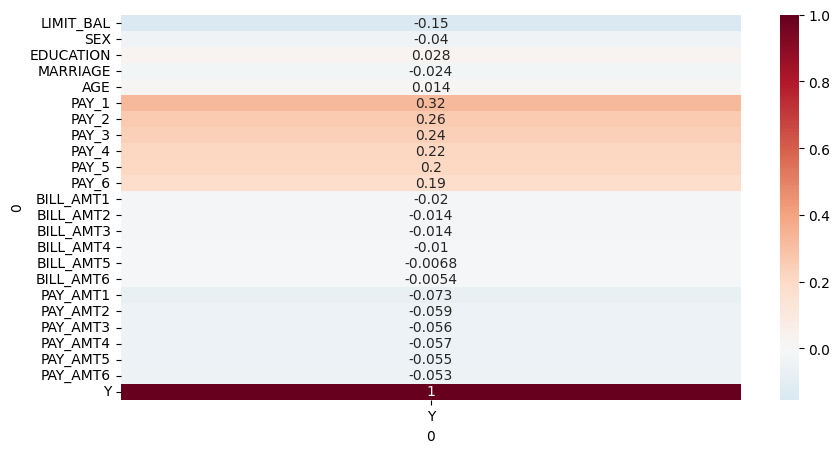

In [16]:
#Pour avoir une idée sur la correlation entre la variable cible et les autres variables
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()[['Y']],cmap="RdBu_r",center=0.0, annot=True);

In [17]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [18]:
data.shape

(30000, 24)

## Data cleaning and preprocessing

### Education and marriage features 

In [19]:
m = (data['EDUCATION'] == 0)|(data['EDUCATION'] == 6)|(data['EDUCATION'] == 5)
data = data.drop(data.EDUCATION[m].index.values, axis=0)
m = (data['MARRIAGE'] == 0)
data = data.drop(data.MARRIAGE[m].index.values, axis=0)




### Paying features

In [20]:
m = (data['PAY_1'] == -2)
data.loc[m, 'PAY_1'] = -1
m = (data['PAY_2'] == -2)
data.loc[m, 'PAY_2'] = -1
m = (data['PAY_3'] == -2)
data.loc[m, 'PAY_3'] = -1
m = (data['PAY_4'] == -2)
data.loc[m, 'PAY_4'] = -1
m = (data['PAY_5'] == -2)
data.loc[m, 'PAY_5'] = -1
m = (data['PAY_6'] == -2)
data.loc[m, 'PAY_6'] = -1


In [21]:
m = (data['PAY_1'] == 0)
data.loc[m, 'PAY_1'] = -1
m = (data['PAY_2'] == 0)
data.loc[m, 'PAY_2'] = -1
m = (data['PAY_3'] == 0)
data.loc[m, 'PAY_3'] = -1
m = (data['PAY_4'] == 0)
data.loc[m, 'PAY_4'] = -1
m = (data['PAY_5'] == 0)
data.loc[m, 'PAY_5'] = -1
m = (data['PAY_6'] == 0)
data.loc[m, 'PAY_6'] = -1


### One-hot encoding for categorical variables

In [22]:
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['SEX'] = data['SEX'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')

data=pd.concat([pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                  pd.get_dummies(data['SEX'], prefix='SEX'), 
                  pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                  data],axis=1)
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
data.head(3)

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,0,1,0,0,0,1,1,0,0,20000,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,0,1,0,0,0,1,0,1,0,120000,26,-1,2,-1,-1,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,0,1,0,0,0,1,0,1,0,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### Replace outliers 

In [23]:
def replace_outliers(data, target_col):
    Q1 = data.drop(columns=target_col).quantile(0.25)
    Q3 = data.drop(columns=target_col).quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for col in data.drop(columns=target_col):
        col_mean = np.mean(data[col])
        data[col] = np.where((data[col] < lower_bound[col]) | (data[col] > upper_bound[col]), col_mean, data[col])

    return data

In [24]:
data = replace_outliers(data,"Y")

In [25]:
data.head(3)

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,20000.0,24.0,-0.413263,-0.528394,-1.0,-1.0,-1.0,-1.000000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,120000.0,26.0,-1.000000,-0.528394,-1.0,-1.0,-1.0,-0.667511,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,90000.0,34.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


## Normalisation

### Robust Scaler 

In [26]:
# Initialise le RobustScaler
scaler = RobustScaler()

# Normalise les données
data[data.columns] = scaler.fit_transform(data[data.columns])

# Affiche la DataFrame normalisée
data.head(3)

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-0.631579,-0.769231,0.586737,0.471606,0.0,0.0,0.0,0.000000,-0.387157,-0.390410,-0.438176,-0.465992,-0.470439,-0.455820,-0.524345,-0.315689,-0.437956,-0.403660,-0.396511,-0.388400,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.105263,-0.615385,0.000000,0.471606,0.0,0.0,0.0,0.332489,-0.413118,-0.420363,-0.393036,-0.385781,-0.380595,-0.369041,-0.524345,-0.241198,-0.194647,-0.134553,-0.396511,0.129467,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.263158,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.146950,-0.152766,-0.146678,-0.114678,-0.081731,-0.042045,-0.145318,-0.121437,-0.194647,-0.134553,-0.132170,0.906266,0.0


#### Question: Faire la comparaison des distributions avec un boxplot par rapport a la variable cible 'default payment next month'

KeyError: 0

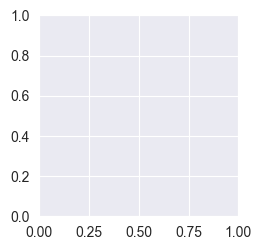

In [32]:
cols = 6
rows = 4
fig = plt.figure(figsize=(cols*3, rows*3))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(data[col], ax=ax)

fig.tight_layout()
plt.show()

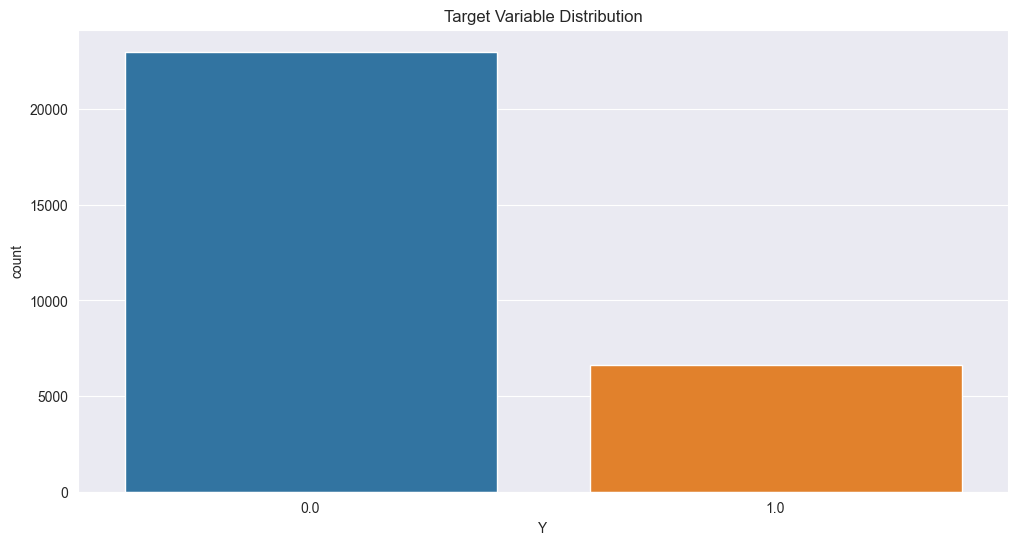

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Y', data = data)
plt.title('Target Variable Distribution')
plt.show()

In [29]:
from imblearn.over_sampling import SMOTE
X = data.drop("Y", axis=1)
y = data["Y"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
count_class_resampled = pd.Series(y_resampled).value_counts()
print(count_class_resampled)
data_res = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Y'])], axis=1)


1.0    22996
0.0    22996
Name: Y, dtype: int64


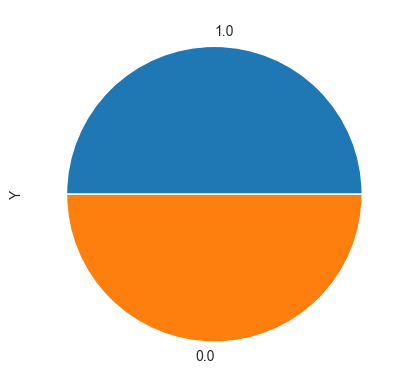

In [30]:
data_res['Y'].value_counts().plot.pie()
plt.show()

#### Question: Pour voir les relations entre ces caractéristiques, faire des graphiques par paire :

In [31]:
sns.pairplot(data, hue='Y', height=2.5)
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000022CC1D7F9D0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022CC5215A60> (for post_execute):


KeyboardInterrupt: 

#### Question: Tracer avec seaborn un graphe qui permet de voir une idée sur la correlation entre la variable 'default payment next month' et les autres variables

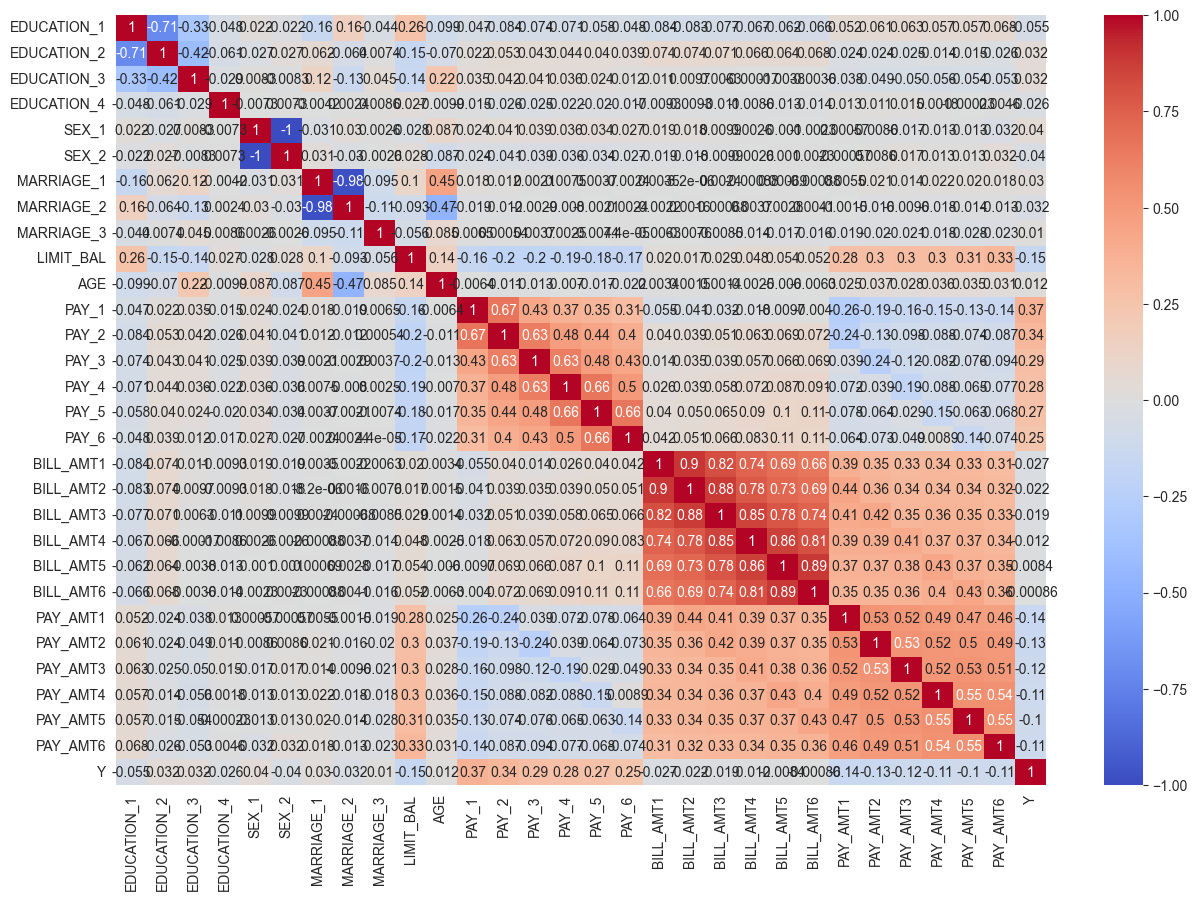

In [33]:
corr_matrix = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

#### Question : Faire la sélection des feautres avec différentes méthodes: SelectKBest, correlation, Recursive Feature Elimination (RFE), VarianceThreshold...

In [34]:
################SELECT K BEST######################
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]
# X est la matrice de caractéristiques
# y est la variable cible
# k est le nombre de fonctionnalités à sélectionner

# Instancier le sélecteur avec la fonction de score f_regression
selector = SelectKBest(score_func=f_regression, k=6)

# Adapter le sélecteur aux données
X_new = selector.fit_transform(X_res, y_res)
idxs_selected = selector.get_support(indices=True)

# Récupérer les noms des fonctionnalités sélectionnées
feat_names_selectKbest = X_res.columns[idxs_selected].tolist()

In [35]:
feat_names_selectKbest

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [36]:
################ RFE ######################
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]
# X est la matrice de caractéristiques
# y est la variable cible
# n_features_to_select est le nombre de fonctionnalités à sélectionner

# Instancier l'estimateur pour la régression linéaire
estimator = LinearRegression()

# Instancier le sélecteur RFE avec l'estimateur et le nombre de fonctionnalités à sélectionner
selector = RFE(estimator, n_features_to_select=6)

# Adapter le sélecteur aux données
selector.fit(X_res, y_res)

# Récupérer les indices des fonctionnalités sélectionnées
idxs_selected = selector.get_support(indices=True)

# Récupérer les noms des fonctionnalités sélectionnées
feat_names_RFE = X_res.columns[idxs_selected].tolist()

In [37]:
feat_names_RFE

['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'PAY_1', 'PAY_3', 'PAY_5']

In [38]:
from sklearn.feature_selection import VarianceThreshold

X_res = data_res.drop("Y", axis=1)

# X est la matrice de caractéristiques
# threshold est le seuil de variance

# Instancier le sélecteur avec le seuil de variance
selector = VarianceThreshold()

# Adapter le sélecteur aux données
X_new = selector.fit_transform(X_res)

# Récupérer les indices des fonctionnalités sélectionnées
idxs_selected = selector.get_support(indices=True)
# Récupérer les noms des fonctionnalités sélectionnées
feat_names_varianceThreshold = X_res.columns[idxs_selected].tolist()

In [39]:
feat_names_varianceThreshold

['EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'SEX_1',
 'SEX_2',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

#### Question: Appliquer l'analyse en composante principale pour faire des représentations graphiques des données.

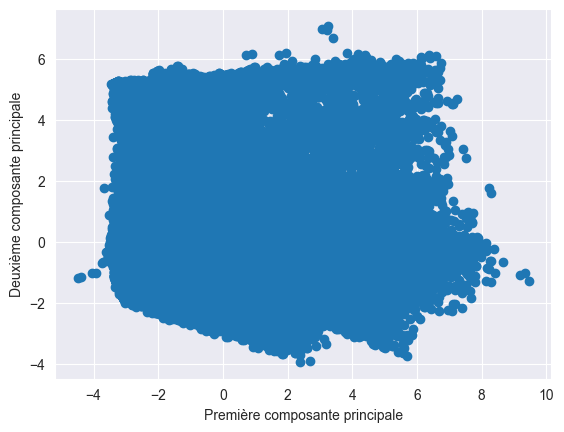

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_res = data_res.drop("Y", axis=1)
# Instancier l'objet PCA avec le nombre de composantes souhaité


pca = PCA(0.99)

X_res= (X_res - X_res.mean()) / X_res.std()
# Appliquer l'ACP aux données
X_pca = pca.fit_transform(X_res)

# Créer un dataframe pour les composantes principales
df_pca = pd.DataFrame(data=X_pca)

# Créer un graphique avec les données projetées sur les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()

#### Question 5:Extraire de `data` : les observations dans une variable`X` et les classes dans une variable `y`


In [41]:
X = data_res[feat_names_RFE]
y = data_res["Y"]

#### Question 6: Diviser l'ensemble des observations X et l'ensemble de classes y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 80% de l'ensemble initial
- un sous-ensemble de test : 20% de l'ensemble initial
##### __Indication__ : Fixer à 0 le générateur aléatoire

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Courbe Roc et Auc

Chaque Courbe Roc et Acu est sous son modele

Cette fonction permet de sortir la courbe de ROC at AUC de chaque modele

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test,y_pred,title='ROC Curve'):
    # Calculer fpr, tpr, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculer AUC score
    roc_auc = auc(fpr, tpr)
    #  ROC curve
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# 

#  MODELING

[38.11283835199478]
[38.11283835199478, 30.16632242635069]
[38.11283835199478, 30.16632242635069, 29.274921187085557]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343, 40.210892488313945]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343, 40.210892488313945, 26.07892162191543]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343, 40.210892488313945, 26.07892162191543, 30.16632242635069]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343, 40.210892488313945, 26.07892162191543, 30.16632242635069, 26.481139254266772]
[38.11283835199478, 30.16632242635069, 29.274921187085557, 27.600826176758343, 40.210892488313945, 26.07892162191543, 30.16632242635069, 26.481139254266772, 30.198934666811606]


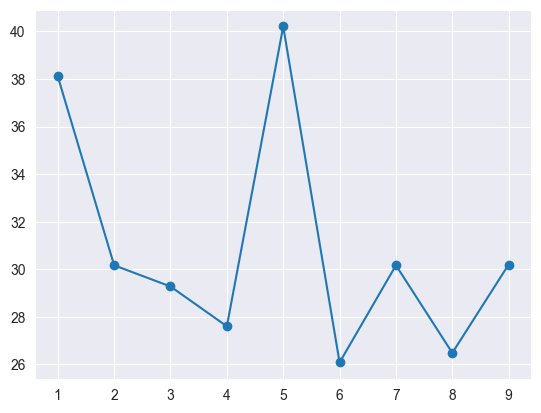

In [44]:
#Séparer les variables explicatives X/Classe y


#Diviser les données (80% Apprentissage et 20% Test)
from sklearn.model_selection import train_test_split

from sklearn import neighbors
errors = []
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
    print(errors)
plt.plot(range(1,10), errors, 'o-')
plt.show()


# 1- K Nearest Neighbor(KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.integration import sklearn as optuna_sklearn
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### En utilisant la méthode GridSearchCV, identifier le meilleur nombre de voisin (tester les valeurs de $n_{neighbors}\in \{1,2,3...25\}$, ainsi que la meilleur distance à utiliser (tester les valeurs de $p\in \{1,2,3,4,5,6 \}$

In [46]:
# Définir l'algorithme de classification KNN
knn = KNeighborsClassifier()

# Définir la fonction objectif pour l'optimisation d'hyperparamètres
def objective(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 25),
        "p": trial.suggest_int("p", 1, 6),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
    }
    knn.set_params(**params)
    scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
    scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    return scores["test_accuracy"].mean()


# Créer une instance de l'étude optuna pour l'optimisation
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-07-18 01:02:36,549] A new study created in memory with name: no-name-ac152cba-420a-4546-8c13-24d4c1808e4b
[I 2023-07-18 01:02:51,462] Trial 0 finished with value: 0.6043579205711389 and parameters: {'n_neighbors': 1, 'p': 5, 'weights': 'distance'}. Best is trial 0 with value: 0.6043579205711389.
[I 2023-07-18 01:03:04,111] Trial 1 finished with value: 0.7354931034517147 and parameters: {'n_neighbors': 18, 'p': 4, 'weights': 'distance'}. Best is trial 1 with value: 0.7354931034517147.
[I 2023-07-18 01:03:14,468] Trial 2 finished with value: 0.7313346232169221 and parameters: {'n_neighbors': 13, 'p': 3, 'weights': 'uniform'}. Best is trial 1 with value: 0.7354931034517147.
[I 2023-07-18 01:03:24,404] Trial 3 finished with value: 0.7253278626490054 and parameters: {'n_neighbors': 6, 'p': 4, 'weights': 'uniform'}. Best is trial 1 with value: 0.7354931034517147.
[I 2023-07-18 01:03:35,434] Trial 4 finished with value: 0.734867974198339 and parameters: {'n_neighbors': 25, 'p': 3, 'we

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [47]:
print("Best hyperparameters:", study.best_params)

Best hyperparameters: {'n_neighbors': 25, 'p': 5, 'weights': 'distance'}


#### Créer une instance __`final_model_knn`__ de l'algorithme de classification par KNN en utilisant les meilleurs hyperparamètres trouvés dans la question précédente
#### Entrainer __`final_model_knn`__ sur le sous-ensemble de données approprié.

In [48]:
# Créer une instance final_model_knn de l'algorithme de classification par KNN en utilisant les meilleurs hyperparamètres trouvés dans la question précédente
final_model_knn = KNeighborsClassifier(**study.best_params)

# Entrainer final_model_knn sur le sous-ensemble de données approprié.
final_model_knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_knn = final_model_knn.predict(X_test)

#### Tracer la matrice de confusion de __`final_model_knn`__

In [49]:
y_pred = final_model_knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred_knn)
pd.DataFrame(confusion, columns=['Classe 0 prédit', 'Classe 1 prédit'], index=['Classe 0 réel', 'Classe 1 réel'])

,Classe 0 prédit,Classe 1 prédit
Classe 0 réel,3845,745
Classe 1 réel,1585,3024


### Afficher le __`classification_report`__ de __`final_model_knn`__

In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77      4590
         1.0       0.80      0.66      0.72      4609

    accuracy                           0.75      9199
   macro avg       0.76      0.75      0.74      9199
weighted avg       0.76      0.75      0.74      9199



In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.7467115990868572


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_pred,title='ROC Curve'):
    # Calculer fpr, tpr, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculer AUC score
    roc_auc = auc(fpr, tpr)
    #  ROC curve
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [53]:
plot_roc_curve(y_test,y_pred_knn,title='ROC Curve pour KNN')

TypeError: plot_roc_curve() got multiple values for argument 'title'

# 

# 

# Pour les autres algoritmes vous allez suivre pratiquement le meme raisonnement.

# 2- Decision Tree

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.

In [54]:
#On va utiliser la Data de base avant La feature selection 
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [55]:
#La data avec feature selection RFE (LinearRegression)
X_res = data_res[feat_names_RFE]
y_res = data_res["Y"]

In [56]:
#La data avec Feature selection Select Kbest
X_res = data_res[feat_names_selectKbest]
y_res = data_res["Y"]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_treeD = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [58]:
from sklearn.tree import DecisionTreeClassifier

#### Créer un dictionaire __`param_grid`__, en vue de configurer les trois hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 19
##### - __`splitter`__ : qui peut être soit best ou random

In [59]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 20),
              'splitter': ['best', 'random']}

#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question précédente. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [61]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


#### Créer une instance __`final_model_dt`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question précédente

In [62]:
final_model_dt = DecisionTreeClassifier(**grid_search.best_params_)
final_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

#### Afficher l'arbre de décision

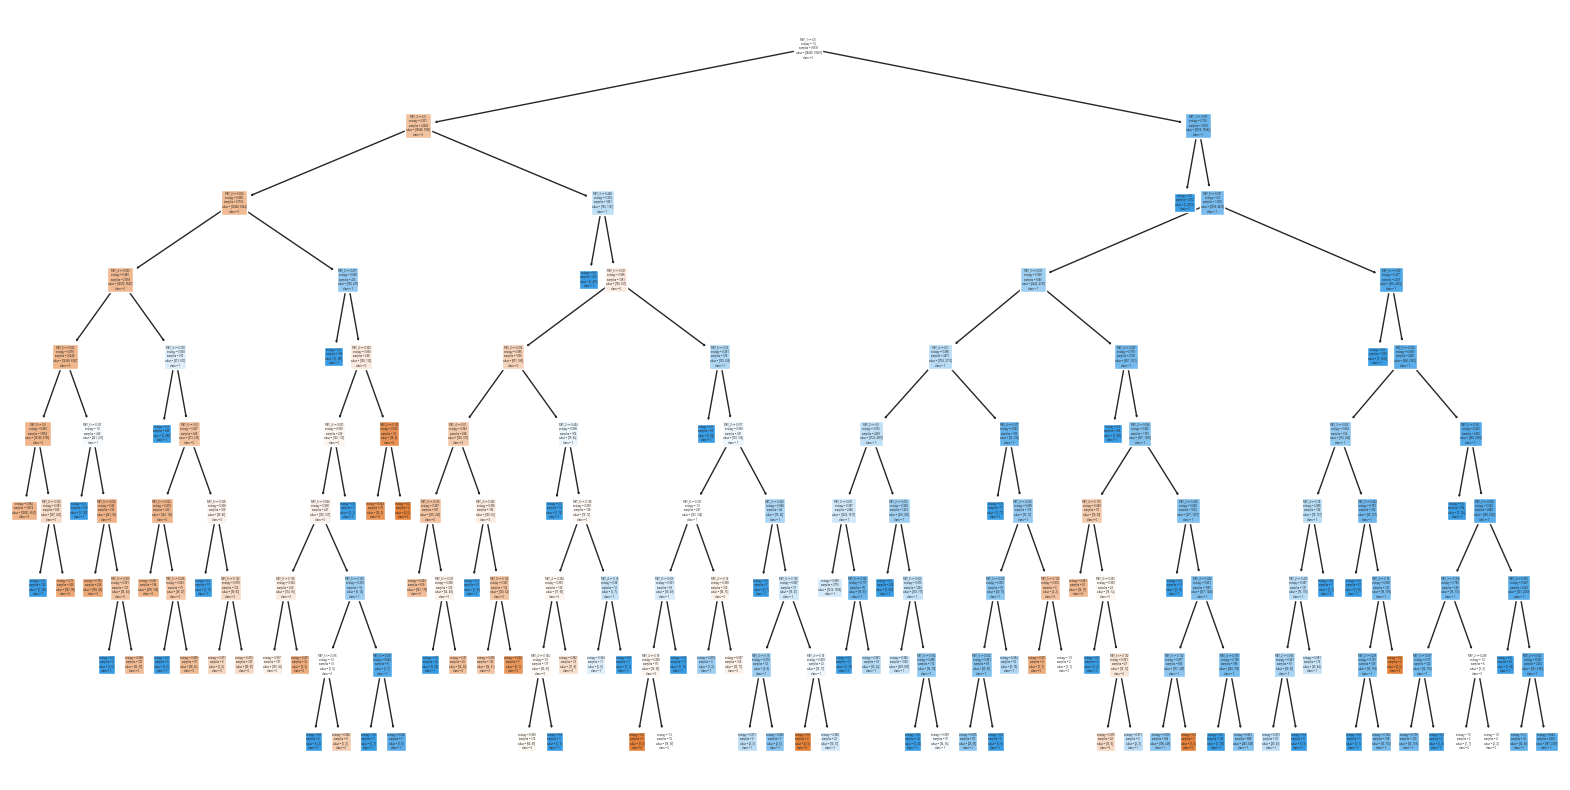

In [63]:
# plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,10))
plot_tree(final_model_dt, feature_names=X_train.columns, class_names=["0", "1"], filled=True)
plt.show()


#### Afficher l'arbre sous forme de régles de décision

In [64]:
from sklearn.tree import export_text

tree_rules = export_text(final_model_dt, feature_names=list(X_train.columns))
print(tree_rules)

|--- PAY_1 <= 0.00
|   |--- PAY_3 <= 0.00
|   |   |--- PAY_2 <= 0.00
|   |   |   |--- PAY_4 <= 0.00
|   |   |   |   |--- PAY_5 <= 0.00
|   |   |   |   |   |--- PAY_6 <= 0.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- PAY_6 >  0.00
|   |   |   |   |   |   |--- PAY_6 <= 0.33
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- PAY_6 >  0.33
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- PAY_5 >  0.00
|   |   |   |   |   |--- PAY_5 <= 0.32
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- PAY_5 >  0.32
|   |   |   |   |   |   |--- PAY_6 <= 0.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- PAY_6 >  0.00
|   |   |   |   |   |   |   |--- PAY_6 <= 0.31
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- PAY_6 >  0.31
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- PAY_4 >  0.00
|   |   |   |   |--- PAY_4 <= 0.38
|   |   |   |   |   |--- class: 1.

Faire la prédiction

In [65]:
y_pred_Dtree = final_model_dt.predict(X_test)

#### Tracer la matrice de confusion de __`final_model_dt`__

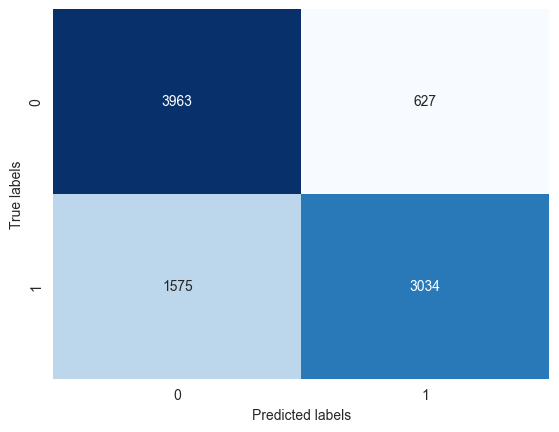

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_treeD, y_pred_Dtree)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [67]:
confusion = confusion_matrix(y_test_treeD, y_pred_Dtree)
pd.DataFrame(confusion, columns=['Classe 0 prédit', 'Classe 1 prédit'], index=['Classe 0 réel', 'Classe 1 réel'])

,Classe 0 prédit,Classe 1 prédit
Classe 0 réel,3963,627
Classe 1 réel,1575,3034


### Afficher le __`classification_report`__ de __`final_model_dt`__

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test_treeD, y_pred_Dtree))

#Résultat avce X_res et y_res (data sans feature selection)

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78      4590
         1.0       0.83      0.66      0.73      4609

    accuracy                           0.76      9199
   macro avg       0.77      0.76      0.76      9199
weighted avg       0.77      0.76      0.76      9199



# 

# 

# 3- LogisticRegression

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [69]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_clf = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [71]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression

1-Créer un dictionnaire param_grid contenant les hyperparamètres :

In [72]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

2-Créer une instance de GridSearchCV pour trouver les meilleurs hyperparamètres :

In [73]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

3-Faire tourner la recherche sur grille et afficher les meilleurs hyperparamètres :

In [74]:
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


4-Créer une instance de LogisticRegression avec les meilleurs hyperparamètres :

In [75]:
best_clf = LogisticRegression(**grid_search.best_params_)

5-Entraîner votre modèle sur les données de formation :

In [76]:
best_clf.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='saga')

#### Tracer la matrice de confusion de __`....`__

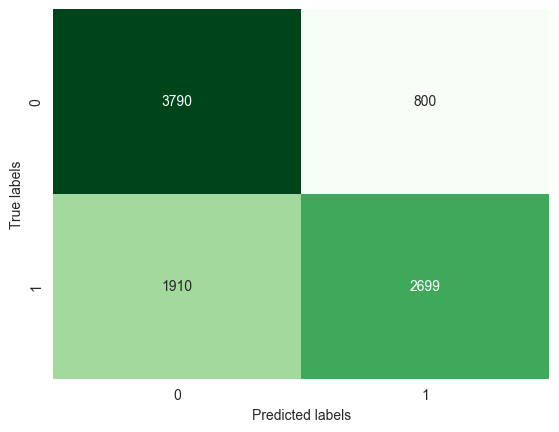

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_clf = best_clf.predict(X_test)
cm = confusion_matrix(y_test_clf, y_pred_clf)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### Afficher le __`classification_report`__ de __`....`__

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74      4590
         1.0       0.77      0.59      0.67      4609

    accuracy                           0.71      9199
   macro avg       0.72      0.71      0.70      9199
weighted avg       0.72      0.71      0.70      9199



In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Accuracy:", accuracy)

Accuracy: 0.7054027611696924


In [81]:
plot_roc_curve(y_test_clf,y_pred_clf,title='ROC Curve pour LogisticRegression')

TypeError: plot_roc_curve() got multiple values for argument 'title'

# 

# 

# 4- GaussianNB (Gaussian Naive Bayes)

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [82]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_gnb = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [84]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB

il n'y a pas d'hyperparamètres pour Gaussian Naive Bayes.

#### Créer une instance __`model`__ de l'algorithme de classification par GaussianNB.
#### Entrainer __`model`__ sur le sous-ensemble de données approprié.

In [85]:
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred_gnb = gnb.predict(X_test)

#### Tracer la matrice de confusion de __`model`__

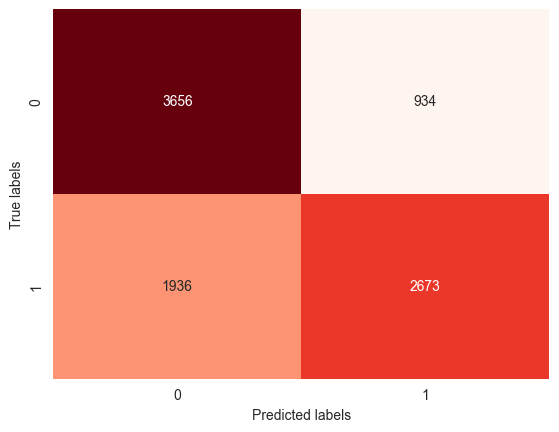

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_gnb, y_pred_gnb)

sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Afficher le __`classification_report`__ de __`model`__

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gnb, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72      4590
         1.0       0.74      0.58      0.65      4609

    accuracy                           0.69      9199
   macro avg       0.70      0.69      0.68      9199
weighted avg       0.70      0.69      0.68      9199



In [90]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_gnb, y_pred_gnb)
print("Accuracy:", accuracy)

Accuracy: 0.6880095662572019


In [91]:
plot_roc_curve(y_test_gnb,y_pred_gnb,title='ROC Curve pour GaussianNB')

TypeError: plot_roc_curve() got multiple values for argument 'title'

# 

# 

# 5- SVM (Support Vector Machine)

1-Importez le module SVM depuis sklearn.svm :

In [92]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [93]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_svm = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

2-Créer un dictionnaire param_grid contenant les hyperparamètres :

In [95]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

3-Créer une instance de GridSearchCV pour trouver les meilleurs hyperparamètres :

In [96]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

4-Faire tourner la recherche sur grille et afficher les meilleurs hyperparamètres :

In [ ]:
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

5-Créer une instance de SVC avec les meilleurs hyperparamètres :

In [ ]:
best_clf = SVC(C=grid_search.best_params_['C'],
               kernel=grid_search.best_params_['kernel'],
               gamma=grid_search.best_params_['gamma'],
               random_state=42)

6-Entraînez le modèle SVM sur les données de formation :


In [ ]:
best_clf.fit(X_train, y_train)


7-Tracez la matrice de confusion avec confusion_matrix de sklearn.metrics :

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_svm = best_clf.predict(X_test)
cm = confusion_matrix(y_test_svm, y_pred)

sns.heatmap(cm, annot=True, cmap='gray', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

8-Afficher le rapport de classification avec classification_report de sklearn.metrics :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_svm, y_pred_svm))


In [ ]:
plot_roc_curve(y_test_svm,y_pred_svm,title='ROC Curve pour SVM')

# 

# 

# 6- Random Forest

Dans cette partie on a utilisé le modele RandomForest Classifier avec BayesSearchCV pour trouver les meilleurs hyperparamètres: 

1-Importez le module RandomForestClassifier depuis sklearn.ensemble :

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [136]:
#On va utiliser la Data de base avant La feature selection 
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_rf = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

2- Créer un dictionnaire param_grid contenant les hyperparamètres:

In [139]:
#Installez cette bibliotheque afin que vous pourriez utilisé BayesSearchCV
!pip install scikit-optimize

In [140]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import StratifiedKFold

param_grid = {'max_depth': Integer(1, 20),
              'n_estimators': Integer(10, 100),
              'min_samples_split': Integer(2, 20),
              'min_samples_leaf': Integer(1, 20)}

3- Créer une instance de BayesSearchCV pour trouver les meilleurs hyperparamètres :

In [141]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier()
bayes_search = BayesSearchCV(rf, param_grid, cv=cv, n_iter=50, n_jobs=-1)


4-Faire tourner la recherche sur grille et afficher les meilleurs hyperparamètres :

In [142]:
bayes_search.fit(X_train, y_train)
print("Best parameters: ", bayes_search.best_params_)

Best parameters:  OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])


5-Créer une instance de RandomForestClassifier avec les meilleurs hyperparamètres :

In [143]:
final_model_rf = RandomForestClassifier(**bayes_search.best_params_)
final_model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20)

6-Afficher l'importance des variables avec feature_importances_ :

In [144]:
importances = final_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


1. feature 11 (0.121673)
2. feature 9 (0.063506)
3. feature 12 (0.059087)
4. feature 17 (0.051565)
5. feature 23 (0.051104)
6. feature 24 (0.048724)
7. feature 10 (0.047622)
8. feature 25 (0.046595)
9. feature 28 (0.044429)
10. feature 18 (0.044134)
11. feature 26 (0.043500)
12. feature 27 (0.042860)
13. feature 19 (0.041612)
14. feature 20 (0.040357)
15. feature 21 (0.039686)
16. feature 22 (0.039240)
17. feature 13 (0.031670)
18. feature 14 (0.030358)
19. feature 16 (0.028952)
20. feature 15 (0.022709)
21. feature 1 (0.010671)
22. feature 2 (0.009158)
23. feature 0 (0.008754)
24. feature 4 (0.007857)
25. feature 5 (0.007630)
26. feature 6 (0.007252)
27. feature 7 (0.007160)
28. feature 8 (0.001623)
29. feature 3 (0.000512)


7-Tracer la matrice de confusion avec confusion_matrix de sklearn.metrics :

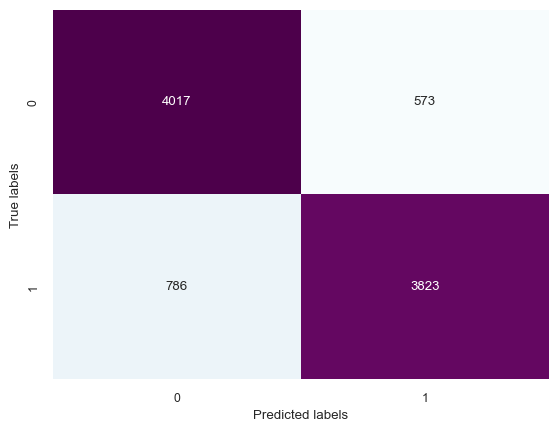

In [145]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rf = final_model_rf.predict(X_test)
cm = confusion_matrix(y_test_rf, y_pred_rf)

sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


8-Afficher le rapport de classification avec classification_report de sklearn.metrics

In [146]:
from sklearn.metrics import classification_report

y_pred = final_model_rf.predict(X_test)
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4590
         1.0       0.87      0.83      0.85      4609

    accuracy                           0.85      9199
   macro avg       0.85      0.85      0.85      9199
weighted avg       0.85      0.85      0.85      9199



9-Calculer l'accuracy du modèle Random Forest avec la fonction accuracy_score de sklearn.metrics :

In [147]:
from sklearn.metrics import accuracy_score

y_pred = final_model_rf.predict(X_test)
accuracy = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8522665507120339


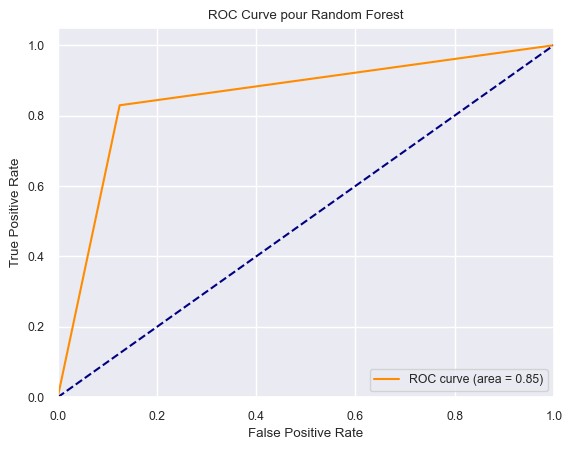

In [148]:
plot_roc_curve(y_test_rf,y_pred_rf,title='ROC Curve pour Random Forest')

# 

# 

# 7- XGBoost

Dans cette partie on a utilisé le modele XGBoost Classifier avec RandomizedSearchCV pour trouver les meilleurs hyperparamètres: 

1-Importer le module XGBClassifier depuis xgboost :

In [40]:
from xgboost import XGBClassifier

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [41]:
#On va utiliser la Data de base avant La feature selection 
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_xgboost = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

2-Créer un dictionnaire param_grid contenant les hyperparamètres:

In [43]:
param_grid = {'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'gamma': [i/10.0 for i in range(0,5)],
              'subsample': [i/10.0 for i in range(6,10)],
              'colsample_bytree': [i/10.0 for i in range(6,10)],
              'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]}


3-Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres :


In [44]:
from sklearn.model_selection import RandomizedSearchCV

clf = XGBClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)


4-Faire tourner la recherche aléatoire et afficher les meilleurs hyperparamètres :

In [45]:
random_search.fit(X_train, y_train)
print(random_search.best_params_)


{'subsample': 0.9, 'reg_alpha': 0.01, 'min_child_weight': 5, 'max_depth': 9, 'gamma': 0.1, 'colsample_bytree': 0.8}


5-Créer une instance de XGBClassifier avec les meilleurs hyperparamètres :

In [46]:
final_model_xgb = XGBClassifier(**random_search.best_params_)
final_model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

6-Afficher l'importance des variables avec plot_importance de xgboost :

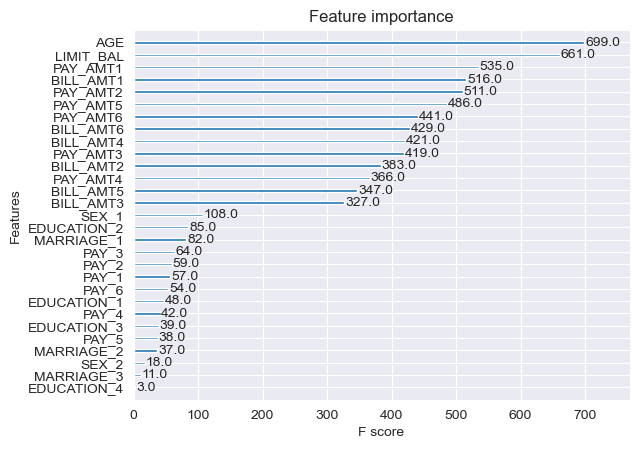

In [47]:
from xgboost import plot_importance

plot_importance(final_model_xgb)
plt.show()


7-Tracer la matrice de confusion avec confusion_matrix de sklearn.metrics :

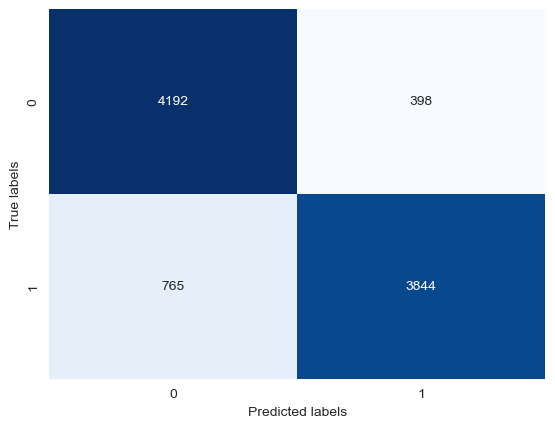

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_xgboost = final_model_xgb.predict(X_test)
cm = confusion_matrix(y_test_xgboost, y_pred_xgboost)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


8-Afficher le rapport de classification avec classification_report de sklearn.metrics :

In [49]:
from sklearn.metrics import classification_report

y_pred = final_model_xgb.predict(X_test)
print(classification_report(y_test_xgboost, y_pred_xgboost))


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4590
         1.0       0.91      0.83      0.87      4609

    accuracy                           0.87      9199
   macro avg       0.88      0.87      0.87      9199
weighted avg       0.88      0.87      0.87      9199



9-Calculer l'accuracy du modèle XGBoost avec la fonction accuracy_score de sklearn.metrics :

In [50]:
from sklearn.metrics import accuracy_score

y_pred = final_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test_xgboost, y_pred_xgboost)
print("Accuracy:", accuracy)

Accuracy: 0.8735732144798347


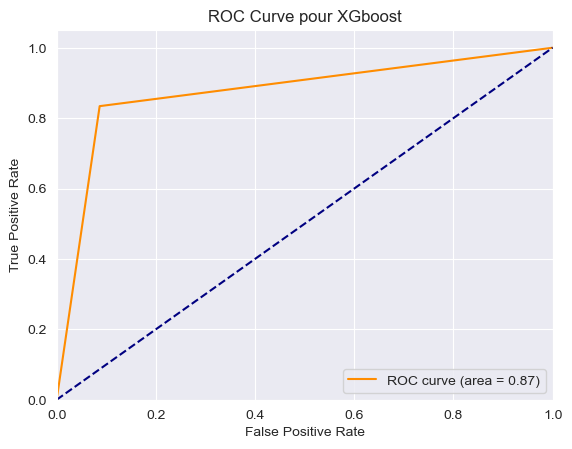

In [51]:
plot_roc_curve(y_test_xgboost,y_pred_xgboost,title='ROC Curve pour XGboost')

# 

# 

# 8- Neural Network

In [52]:
X_res = data_res[feat_names_RFE]
y_res = data_res["Y"]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_mlp = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
# Initialiser Multi-layer Perceptron 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

#Entrainer le classifieur
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [56]:
# Faire les prédictions
y_pred_mlp = mlp.predict(X_test)

# Cross_val score
from sklearn.model_selection import cross_val_score
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

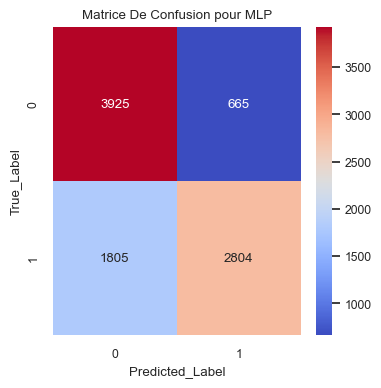

In [57]:
# confusion matrix pour Multi-layer Perceptron.
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test_mlp,y_pred_mlp)
sns.set(font_scale=0.8)
plt.subplots(figsize=(4, 4))
sns.heatmap(matrix,annot=True, cmap='coolwarm',fmt="d")
plt.ylabel('True_Label')
plt.xlabel('Predicted_Label')
plt.title('Matrice De Confusion pour MLP');

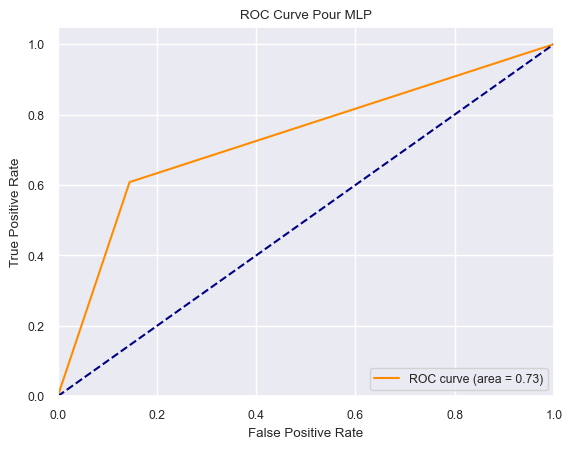

In [58]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites de classe positive pour l'ensemble de test
mlp_prob = mlp.predict_proba(X_test)[:,1]

# Calculer fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_pred_mlp)

# Calculer AUC score
roc_auc = auc(fpr, tpr)

#  ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Pour MLP')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mlp, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76      4590
         1.0       0.81      0.61      0.69      4609

    accuracy                           0.73      9199
   macro avg       0.75      0.73      0.73      9199
weighted avg       0.75      0.73      0.73      9199



In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_mlp, y_pred_mlp)
print("Accuracy:", accuracy)

Accuracy: 0.7314925535384281


# 

# 

# 9- KerasClassifier

In [61]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_keras = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

1-Créer une fonction pour le modèle :

In [64]:
def create_model(optimizer='adam', activation='relu', units=64):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


2-Créer une instance de KerasClassifier pour utiliser avec GridSearchCV :

In [65]:
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\rachi\AppData\Local\Temp\ipykernel_26716\2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


3-Créer un dictionnaire param_grid contenant les hyperparamètres :

In [66]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'units': [32, 64, 128]
}

4-Créez une instance de GridSearchCV pour trouver les meilleurs hyperparamètres :

In [67]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

5-Faire tourner la recherche sur grille et affichez les meilleurs hyperparamètres :

In [68]:
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'activation': 'relu', 'optimizer': 'adam', 'units': 128}


6-Créer une instance de modèle avec les meilleurs hyperparamètres :

In [69]:
best_model = create_model(optimizer=grid_search.best_params_['optimizer'],
                          activation=grid_search.best_params_['activation'],
                          units=grid_search.best_params_['units'])

7-Entraîner votre modèle sur les données de formation :

In [70]:
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

8-Tracer la matrice de confusion avec confusion_matrix de sklearn.metrics :

In [72]:
from sklearn.metrics import confusion_matrix
y_pred_keras = best_model.predict(X_test)



288/288 [==============================] - 0s 736us/step


In [74]:
y_pred_keras   = (y_pred_keras > 0.5)
cm = confusion_matrix(y_test_keras, y_pred_keras )
print(cm)

[[3526 1064]
 [1332 3277]]


9-Afficher le rapport de classification avec classification_report de sklearn.metrics :

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test_keras, y_pred_keras  ))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75      4590
         1.0       0.75      0.71      0.73      4609

    accuracy                           0.74      9199
   macro avg       0.74      0.74      0.74      9199
weighted avg       0.74      0.74      0.74      9199



In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_keras, y_pred_keras  )
print("Accuracy:", accuracy)

Accuracy: 0.739536906185455


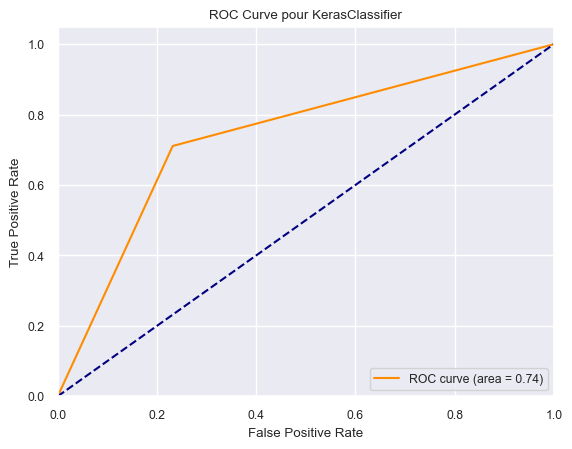

In [77]:
plot_roc_curve(y_test_keras,y_pred_keras,title='ROC Curve pour KerasClassifier') 

# 10- GradientBoostingClassifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_gbt = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [81]:
# Creation du model GradientBoostingClassifier
gbt = GradientBoostingClassifier()

# Entrainer le modele sur les données
gbt.fit(X_train, y_train)

# Faire la prédiction

y_pred_gbt = gbt.predict(X_test)

# Evaluation du modele
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_gbt, y_pred_gbt)
print("Accuracy:", accuracy)

Accuracy: 0.8123709098815088


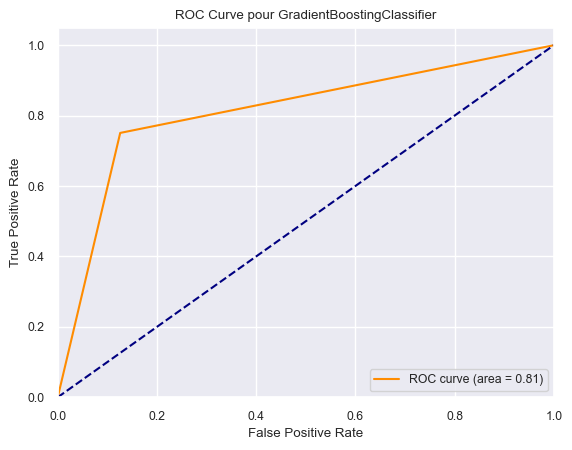

In [82]:
plot_roc_curve(y_test_gbt,y_pred_gbt,title='ROC Curve pour GradientBoostingClassifier')

# 11- CatBoostClassifier

In [40]:
from catboost import CatBoostClassifier

In [41]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_catboost = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [43]:
# Creation du modele CatBoost classifier
catboost = CatBoostClassifier()

# Train the model on the training data
catboost.fit(X_train, y_train)

# Make predictions on new data

y_pred_catboost = catboost.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_catboost, y_pred_catboost)
print("Accuracy:", accuracy)

Learning rate set to 0.04803
0:	learn: 0.6709636	total: 163ms	remaining: 2m 42s
1:	learn: 0.6549059	total: 181ms	remaining: 1m 30s
2:	learn: 0.6378959	total: 194ms	remaining: 1m 4s
3:	learn: 0.6254126	total: 205ms	remaining: 51s
4:	learn: 0.6163142	total: 216ms	remaining: 42.9s
5:	learn: 0.6078390	total: 226ms	remaining: 37.5s
6:	learn: 0.5980288	total: 236ms	remaining: 33.5s
7:	learn: 0.5895893	total: 247ms	remaining: 30.6s
8:	learn: 0.5814119	total: 258ms	remaining: 28.4s
9:	learn: 0.5749522	total: 269ms	remaining: 26.6s
10:	learn: 0.5698366	total: 281ms	remaining: 25.2s
11:	learn: 0.5653353	total: 292ms	remaining: 24.1s
12:	learn: 0.5605927	total: 305ms	remaining: 23.1s
13:	learn: 0.5551275	total: 317ms	remaining: 22.3s
14:	learn: 0.5512449	total: 330ms	remaining: 21.6s
15:	learn: 0.5480397	total: 343ms	remaining: 21.1s
16:	learn: 0.5437401	total: 356ms	remaining: 20.6s
17:	learn: 0.5391932	total: 370ms	remaining: 20.2s
18:	learn: 0.5365239	total: 384ms	remaining: 19.8s
19:	learn: 0

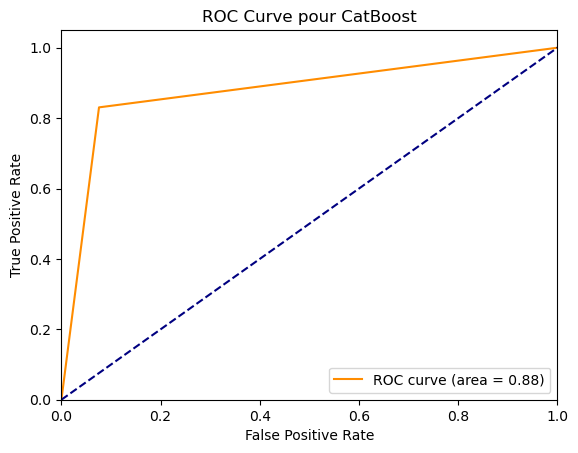

In [44]:
plot_roc_curve(y_test_catboost,y_pred_catboost,title='ROC Curve pour CatBoost')

# 12- Lightgbm

In [88]:
import lightgbm as lgb

In [89]:
X_res = data_res.drop("Y", axis=1)
y_res = data_res["Y"]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_lgb = train_test_split(X_res,y_res, test_size=0.2, random_state=0)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the grid of hyperparameters to search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.5]}

# Create a GridSearchCV object and fit it to the data
lgb_model = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

final_model_lgb = grid_search.best_estimator_
y_pred_lgb = final_model_lgb.predict(X_test)

# Report accuracy score
accuracy = accuracy_score(y_test_lgb, y_pred_lgb)
print("Accuracy:", accuracy)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.8731383846070225


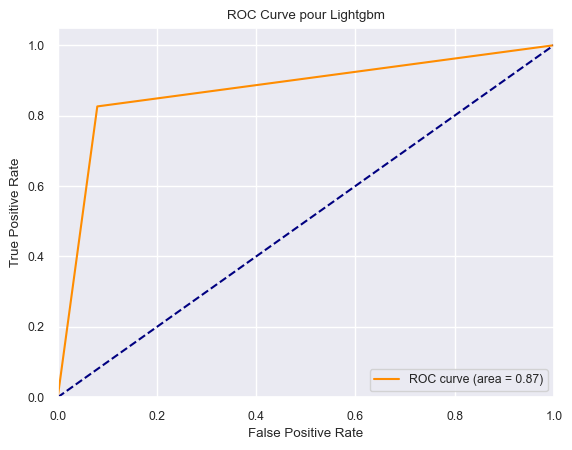

In [92]:
plot_roc_curve(y_test_lgb,y_pred_lgb,title='ROC Curve pour Lightgbm')

# Etude compartive

| Algorithm          | weighted_avg_recall | weighted_avg_precsion | weighted_avg_F1-score|
|--------------------|---------------------|-----------------------|----------------------|
| KNN                | ?                   | ?                     | ?                    |
| Decision Tree      | ?                   | ?                     | ?                    |
| GaussianNB         | ?                   | ?                     | ?                    |
| LogisticRegression | ?                   | ?                     | ?                    |
| SVM                | ?                   | ?                     | ?                    |
| Random Forest      | ?                   | ?                     | ?                    |
| XGBOOST            | ?                   | ?                     | ?                    |
| Neural Network     | ?                   | ?                     | ?                    |
| Keras Classifier   | ?                   | ?                     | ?                    |
| GradientBoostingC  | ?                   | ?                     | ?                    |
| CatBoostClassifier | ?                   | ?                     | ?                    |
| Lightgbm           | ?                   | ?                     | ?                    |

Cette fonction nous permet de 

In [ ]:
def result(y_test, y_prediction):
    y_test = pd.Series(y_test)
    y_prediction = pd.Series(y_prediction)
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_test)):
        if y_test.iloc[i] == 1 and y_prediction.iloc[i]==1:
            tp+=1
        elif y_test.iloc[i]==0 and y_prediction.iloc[i]==1:
            fp+=1
        elif y_test.iloc[i]==0 and y_prediction.iloc[i]==0:
            tn+=1
        else:
            fn+=1
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    fpr = fp/(fp+tn)
    precision = tp/(tp+fp)
    f = 2 * precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)

    return ({'Precision':precision,'Recall':tpr, 'Specificity':tnr,'False Positive Rate':fpr,
             'f-score':f, 'Accuracy':accuracy,'tp':tp,'fp':fp,'tn':tn,'fn':fn})

In [ ]:
res_knn = result(y_test_knn,y_pred_knn)
res_treeD  = result(y_test_treeD,y_pred_treeD)
res_clf  = result(y_test_clf,y_pred_clf)
res_gnb  = result(y_test_gnb,y_pred_gnb)
res_svm = result(y_test_svm,y_pred_svm)
res_rf = result(y_test_rf,y_pred_rf)
res_xgboost = result(y_test_xgboost,y_pred_xgboost)
res_mlp = result(y_test_mlp,y_pred_mlp)
res_keras = result(y_test_keras,y_pred_keras)
res_gbt = result(y_test_gbt,y_pred_gbt)
res_catboost = result(y_test_catboost,y_pred_catboost)
res_lgb = result(y_test_lgb,y_pred_lgb)

In [ ]:
res_ml=pd.DataFrame([res_knn,res_treeD,res_clf,res_gnb,res_svm,res_rf,res_xgboost,res_mlp,res_keras
                    ,res_gbt,res_catboost,res_lgb],
             index=['Knn','Decision tree','clf','Gnb','svm','Randomf','XGboost','MPL','keras',
                    'Gbt','Catboost','lgb'])
res_ml
#res_ml=pd.DataFrame([res_xgboost,res_mlp_prob,res_KerasC,res_gbt,res_catboost,res_lgb],
#            index=['CLF','GNB','Lightgb'])
#res_ml

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ind = np.arange(3)
width = 0.2
rects1 = ax.bar(ind,res_ml['Accuracy'],width, color='tab:blue')
rects2 = ax.bar(ind+width,res_ml['f-score'],width, color='tab:green')
rects3 = ax.bar(ind+width*2,res_ml['Precision'],width, color='tab:cyan')

ax.set_xticks(ind + width)
ax.set_xticklabels(('clf','gnb','lgb'))
ax.legend((rects1[0], rects2[0],rects3[0]), ('Accuracy', 'f-score','Precision'),loc='center left',bbox_to_anchor=(1, 0.4))
ax.set_ylabel('Value')
ax.set_title('ML results')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{:.1%}'.format(height),
                ha='center', va='bottom' , )
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.savefig('ML_result.png', dpi=600,bbox_inches="tight")

In [ ]:
plot_roc_curve(y_test_mpl,y_pred_mpl,title='ROC Curve pour Neural Network')